In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
# fetch dataset

  
# fetch dataset 
covertype = fetch_ucirepo(id=31) 
  
# data (as pandas dataframes) 
X = covertype.data.features 
y = covertype.data.targets 
  
# metadata 
print(covertype.metadata) 
  
# variable information 
print(covertype.variables) 



{'uci_id': 31, 'name': 'Covertype', 'repository_url': 'https://archive.ics.uci.edu/dataset/31/covertype', 'data_url': 'https://archive.ics.uci.edu/static/public/31/data.csv', 'abstract': 'Classification of pixels into 7 forest cover types based on attributes such as elevation, aspect, slope, hillshade, soil-type, and more.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 581012, 'num_features': 54, 'feature_types': ['Categorical', 'Integer'], 'demographics': [], 'target_col': ['Cover_Type'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Sat Mar 16 2024', 'dataset_doi': '10.24432/C50K5N', 'creators': ['Jock Blackard'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting forest cover type from cartographic variables only (no remotely sensed data).  The actual forest cover type for a given observation (30 x 30 meter cell) was determined from

In [2]:
feature_names = X.columns.tolist()
feature_names

['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'Wilderness_Area1',
 'Soil_Type1',
 'Soil_Type2',
 'Soil_Type3',
 'Soil_Type4',
 'Soil_Type5',
 'Soil_Type6',
 'Soil_Type7',
 'Soil_Type8',
 'Soil_Type9',
 'Soil_Type10',
 'Soil_Type11',
 'Soil_Type12',
 'Soil_Type13',
 'Soil_Type14',
 'Soil_Type15',
 'Soil_Type16',
 'Soil_Type17',
 'Soil_Type18',
 'Soil_Type19',
 'Soil_Type20',
 'Soil_Type21',
 'Soil_Type22',
 'Soil_Type23',
 'Soil_Type24',
 'Soil_Type25',
 'Soil_Type26',
 'Soil_Type27',
 'Soil_Type28',
 'Soil_Type29',
 'Soil_Type30',
 'Soil_Type31',
 'Soil_Type32',
 'Soil_Type33',
 'Soil_Type34',
 'Soil_Type35',
 'Soil_Type36',
 'Soil_Type37',
 'Soil_Type38',
 'Soil_Type39',
 'Soil_Type40',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Wilderness_Area4']

In [3]:
X.shape

(581012, 54)

In [4]:
X = X.drop(columns=[col for col in X.columns if col.startswith("Soil_Type")])
# X = X.drop(columns=[col for col in X.columns if col.startswith("Wilderness_Area")])

In [5]:
X = X.sample(n=10000, random_state=42)

In [6]:
feature_names = X.columns.tolist()
feature_names

['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'Wilderness_Area1',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Wilderness_Area4']

In [7]:
print(X["Aspect"].describe())

count    10000.000000
mean       155.888700
std        111.942027
min          0.000000
25%         59.000000
50%        128.000000
75%        261.000000
max        360.000000
Name: Aspect, dtype: float64


In [8]:
X["aspect_group"] = pd.qcut(X["Aspect"], q=30, labels=False, duplicates='drop')
print(X["aspect_group"].value_counts().sort_index())  # Check group sizes

aspect_group
0     354
1     339
2     330
3     352
4     307
5     328
6     349
7     313
8     363
9     335
10    301
11    358
12    327
13    320
14    334
15    332
16    328
17    347
18    328
19    326
20    337
21    327
22    337
23    331
24    340
25    329
26    342
27    331
28    335
29    320
Name: count, dtype: int64


In [9]:
X = X.drop(columns=["Aspect"])

In [10]:
grouped_data = []

for _, group in X.groupby("aspect_group"):
    group_data = group.drop(columns=["aspect_group"]).to_numpy()
    grouped_data.append(group_data)

In [11]:
grouped_data

[array([[3217,   10,   30, ...,    0,    1,    0],
        [3422,   19,  408, ...,    1,    0,    0],
        [3171,   11,  258, ...,    0,    1,    0],
        ...,
        [2739,   21,   42, ...,    0,    0,    0],
        [2761,    9,  124, ...,    0,    1,    0],
        [2794,    8,   30, ...,    0,    0,    0]], shape=(354, 13)),
 array([[2602,   16,  272, ...,    0,    1,    0],
        [2822,    8,  108, ...,    0,    0,    0],
        [3017,    9,   60, ...,    0,    0,    0],
        ...,
        [2472,    4,  180, ...,    0,    0,    1],
        [3251,   12,  170, ...,    0,    0,    0],
        [3224,   17,  201, ...,    0,    1,    0]], shape=(339, 13)),
 array([[2572,    9,  201, ...,    0,    1,    0],
        [2962,   14,  150, ...,    0,    0,    0],
        [2999,    6,    0, ...,    0,    0,    0],
        ...,
        [2847,   12,  404, ...,    0,    1,    0],
        [2540,   19,  210, ...,    0,    1,    0],
        [3280,   13,  750, ...,    0,    1,    0]], shap

In [12]:
datasets = grouped_data

In [13]:
from src.ocsmm.OneClassSMMClassifier import OneClassSMMClassifier

In [14]:
classifier = OneClassSMMClassifier(nu=0.1)

In [15]:
classifier.fit(datasets)

Best gamma found.

kappa matrix calculated.

Found the alphas.



In [16]:
decision, y_pred = classifier.predict(datasets)

Calculating kappa...

calculatin rho
[2.91062351 2.91062316 2.91063389 2.9106236  2.91062364 2.91072224
 2.90384611]


In [17]:
decision

array([ 0.00147282,  0.0094179 ,  0.02104009,  0.01372551,  0.0045163 ,
        0.00095263,  0.01280319,  0.01445129,  0.00095228,  0.00925278,
        0.00777537,  0.01125227,  0.00526648,  0.00096301,  0.01584313,
        0.01668085,  0.02473718,  0.03426738,  0.00095272,  0.00095276,
        0.01024911,  0.00105136, -0.00582477,  0.01639294,  0.016672  ,
        0.01791382,  0.00858135,  0.02800472,  0.02399968,  0.03016378])

In [18]:
y_pred

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.])

In [19]:
outlier_indices = [i for i, value in enumerate(y_pred) if value == -1]
outlier_indices

[22]

In [20]:
feature_names.remove("Aspect")

In [21]:
from src.explanation_algorithms.OCSMMSHAP import OCSMMSHAP
ocsmm_shap = OCSMMSHAP(X=datasets, classifier=classifier, decision=decision)
ocsmm_shap.fit_ocsmmshap(X=datasets, num_coalitions=2**len(feature_names))

/home/swathi/OCSVM-SHAP/src/utils/shapley_procedure/coalitions.py:18: RuntimeWarning: divide by zero encountered in log2
  set_to_1 = np.floor(np.log2(rest)).astype(int)
/home/swathi/OCSVM-SHAP/src/utils/shapley_procedure/coalitions.py:18: RuntimeWarning: invalid value encountered in cast
  set_to_1 = np.floor(np.log2(rest)).astype(int)
/home/swathi/OCSVM-SHAP/src/utils/shapley_procedure/coalitions.py:18: RuntimeWarning: invalid value encountered in log2
  set_to_1 = np.floor(np.log2(rest)).astype(int)
Parallel projections: 100%|██████████| 8191/8191 [04:57<00:00, 27.52it/s]


In [22]:
shapley_values = ocsmm_shap.return_deterministic_shapley_values()

In [23]:
shapley_values.T.shape

torch.Size([30, 13])

In [24]:
feature_names

['Elevation',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'Wilderness_Area1',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Wilderness_Area4']

/home/swathi/micromamba/envs/py311/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


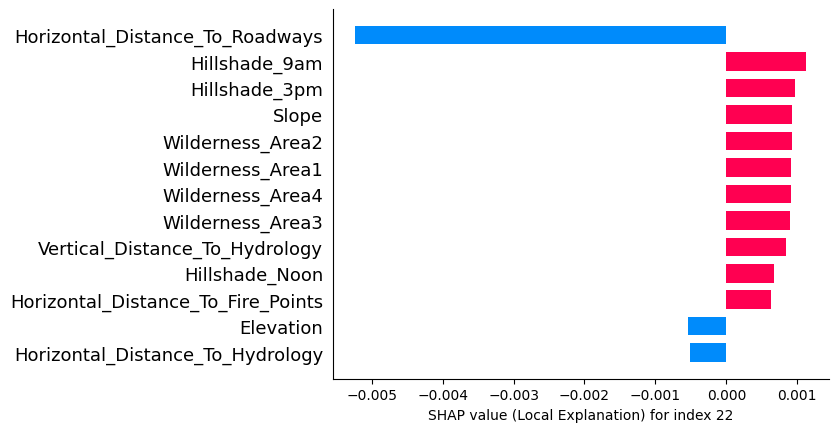

In [25]:
from src.utils.visualisation.deterministic_values import local_bar_plot, global_bar_plot
local_bar_plot(shapley_values, 22, feature_names=feature_names)

In [26]:
# bar_plot(mean_stochastic_shapley_values.T[8], datasets[8], feature_names=feature_names)

In [55]:
# local_bar_plot(shapley_values, 9, feature_names=feature_names)

/tmp/ipykernel_175451/4102441729.py:3: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  mean_abs_shap_values = np.abs(shapley_values.T).mean(axis=0)
/home/swathi/OCSVM-SHAP/src/utils/visualisation/deterministic_values.py:12: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3725.)
  shap.bar_plot(shapley_values.T, show=False, max_display=20,**kwargs)


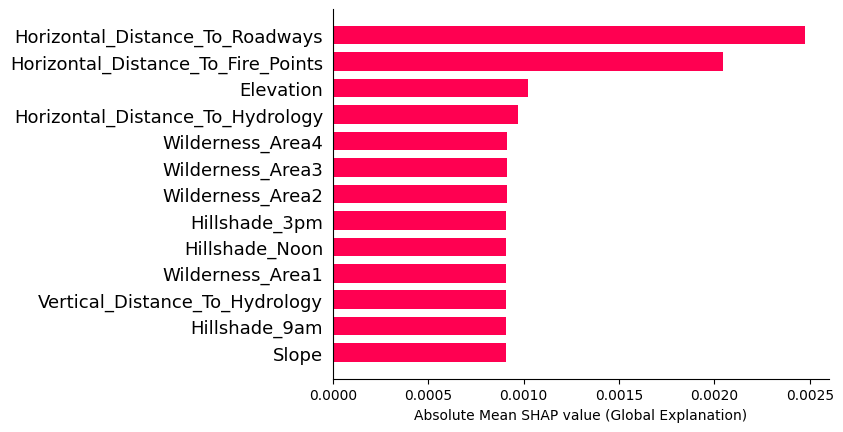

In [28]:
import numpy as np
# global importance measure
mean_abs_shap_values = np.abs(shapley_values.T).mean(axis=0)  

# Call bar_plot for global explanation
global_bar_plot(mean_abs_shap_values, feature_names=feature_names)

/tmp/ipykernel_175451/1469941899.py:2: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  mean_abs_shap_values_outlier = np.abs(selected_shap_values).mean(axis=1)


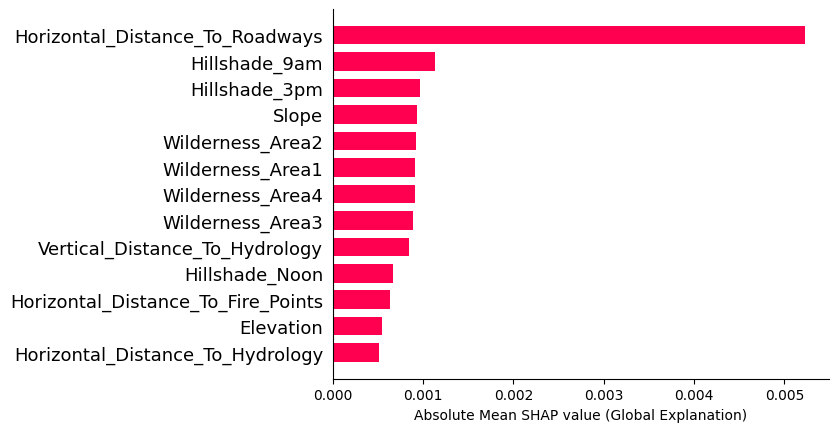

In [29]:
selected_shap_values = shapley_values[:,outlier_indices]
mean_abs_shap_values_outlier = np.abs(selected_shap_values).mean(axis=1) 
global_bar_plot(mean_abs_shap_values_outlier, feature_names=feature_names)

In [30]:
import matplotlib.pyplot as plt

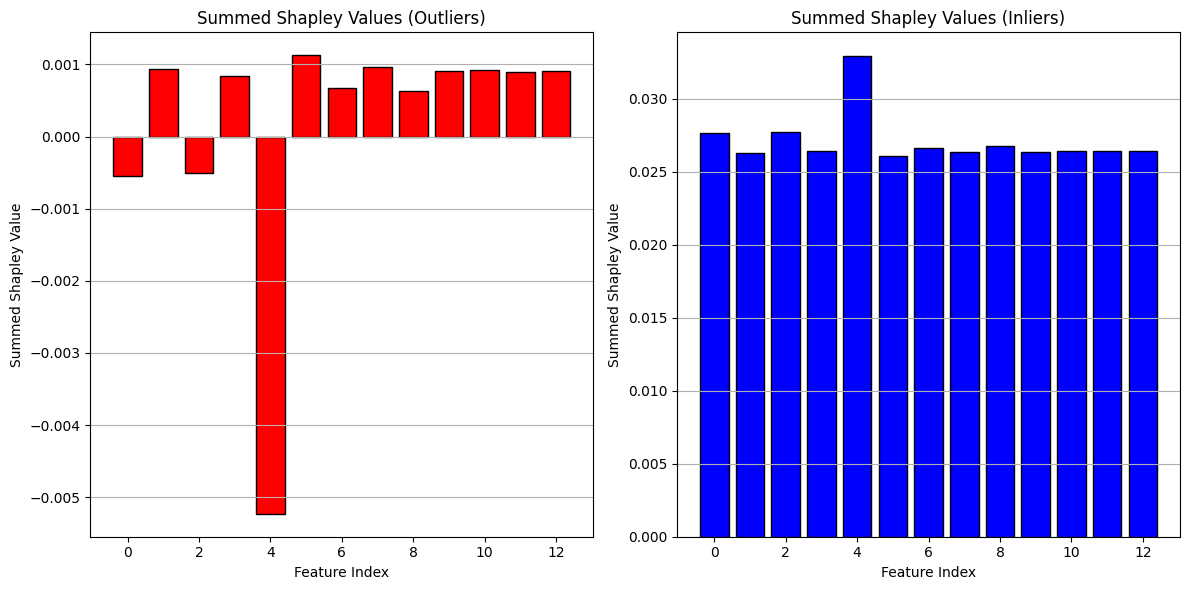

In [31]:
inlier_indices = [i for i in range(shapley_values.shape[1]) if i not in outlier_indices]

summed_outlier_shapley = shapley_values[:, outlier_indices].sum(dim=1).numpy()
summed_inlier_shapley = shapley_values[:, inlier_indices].sum(dim=1).numpy()

# Plot histogram
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Outlier Shapley Values
ax[0].bar(range(len(summed_outlier_shapley)), summed_outlier_shapley, color='red', edgecolor='black')
ax[0].set_title('Summed Shapley Values (Outliers)')
ax[0].set_xlabel('Feature Index')
ax[0].set_ylabel('Summed Shapley Value')
ax[0].grid(True, axis='y')

# Inlier Shapley Values
ax[1].bar(range(len(summed_inlier_shapley)), summed_inlier_shapley, color='blue', edgecolor='black')
ax[1].set_title('Summed Shapley Values (Inliers)')
ax[1].set_xlabel('Feature Index')
ax[1].set_ylabel('Summed Shapley Value')
ax[1].grid(True, axis='y')

plt.tight_layout()
plt.show()

The inliers seem to approximately have an equal contributions from all feature towards its decision, but for outliers, some feature contribute more towards making them outleirs. 


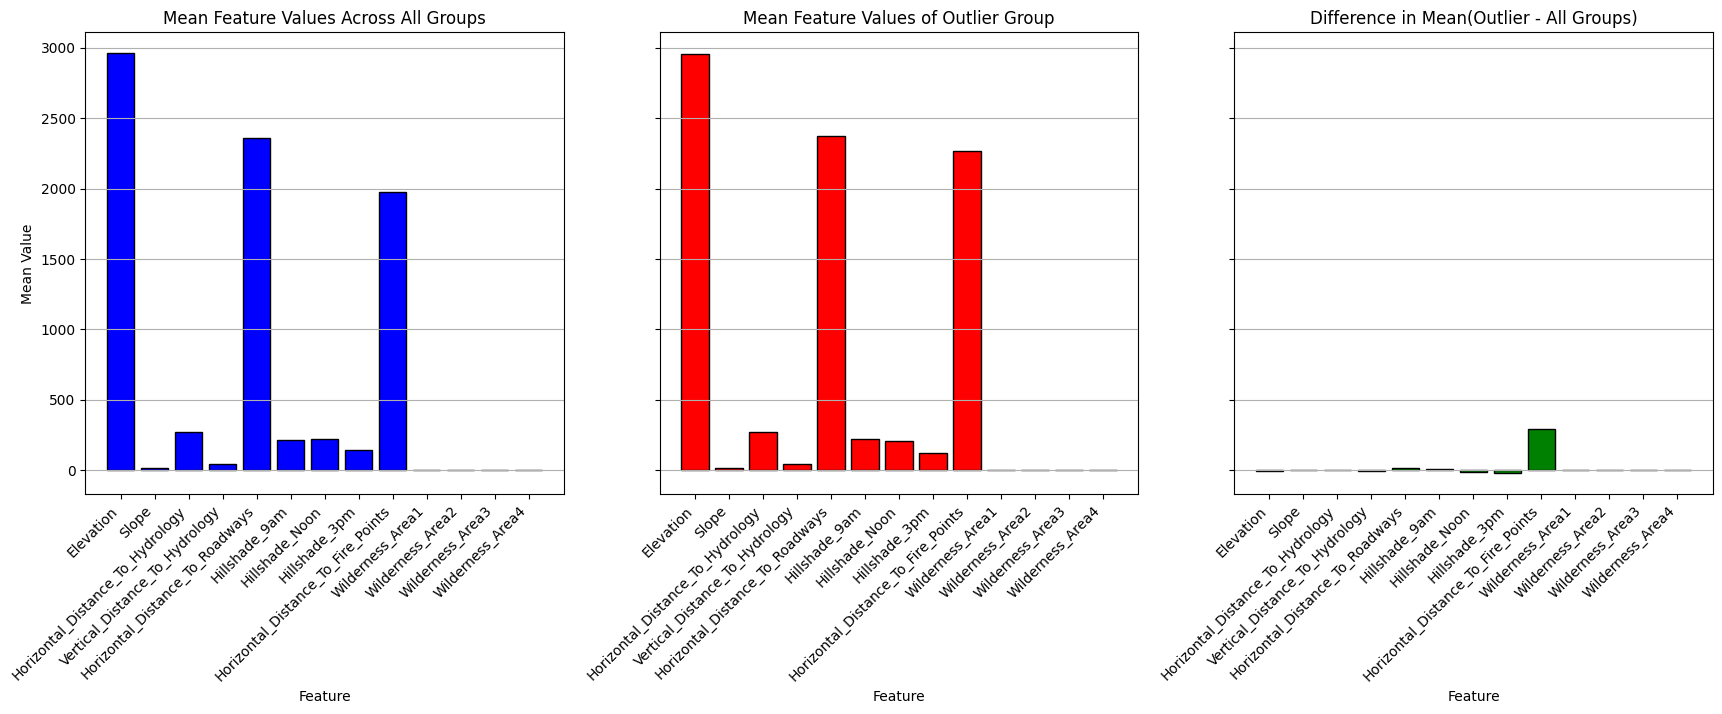

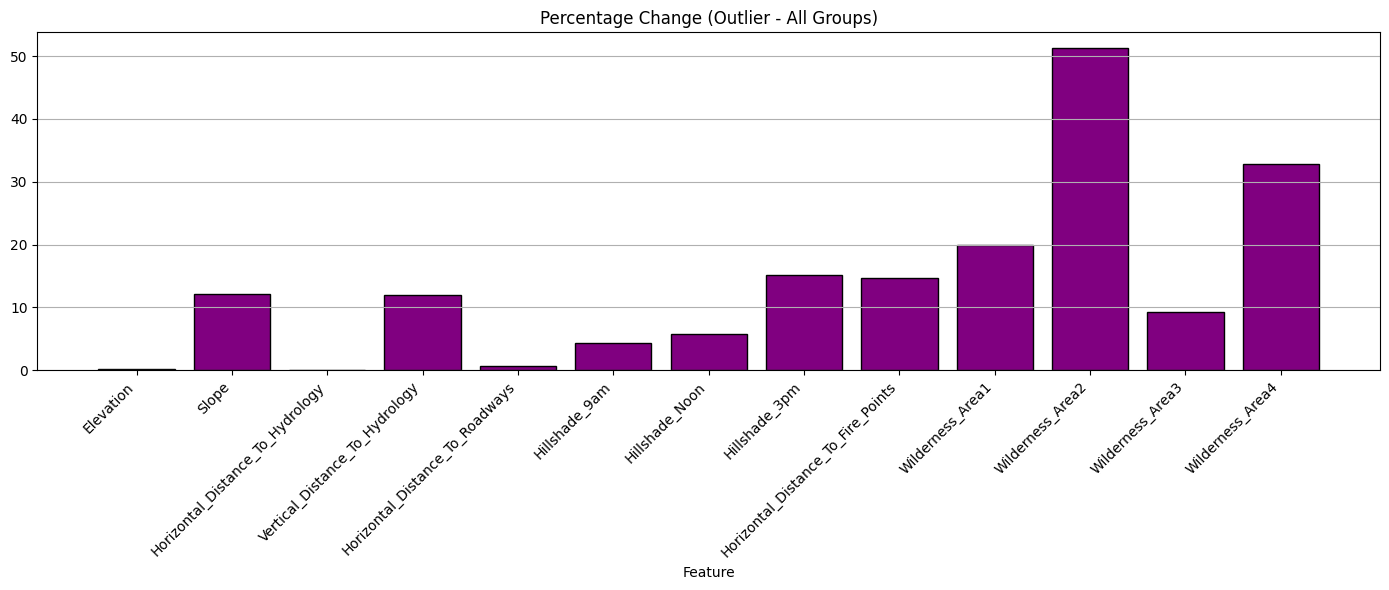

In [32]:
mean_all_groups = np.mean([np.mean(group, axis=0) for i, group in enumerate(datasets) if i != 8], axis=0)
std_deviation_all_groups = np.std([np.mean(group, axis=0) for i, group in enumerate(datasets) if i != 8], axis=0)
# Compute mean feature values for the outlier group
mean_outlier_group = np.mean(datasets[5], axis=0)
std_deviation_outlier_group = np.std(datasets[5], axis=0)

avg_std = (std_deviation_outlier_group+std_deviation_all_groups)/2
# Compute the delta between the two (outlier vs all groups)
difference_values = mean_outlier_group - mean_all_groups

percentage_change = abs((mean_outlier_group - mean_all_groups) / mean_all_groups) * 100

# Feature names for labeling
num_features = len(mean_all_groups)
x_labels = feature_names[:num_features]  # Adjust based on the number of features

# Plot histograms
fig, ax = plt.subplots(1, 3, figsize=(21, 6), sharey=True)

# Mean feature values for all groups (excluding outlier)
ax[0].bar(range(num_features), mean_all_groups, color='blue', edgecolor='black')
ax[0].set_xticks(range(num_features))
ax[0].set_xticklabels(x_labels, rotation=45, ha='right')
ax[0].set_title('Mean Feature Values Across All Groups')
ax[0].set_xlabel('Feature')
ax[0].set_ylabel('Mean Value')
ax[0].grid(axis='y')

# Mean feature values for the outlier group
ax[1].bar(range(num_features), mean_outlier_group, color='red', edgecolor='black')
ax[1].set_xticks(range(num_features))
ax[1].set_xticklabels(x_labels, rotation=45, ha='right')
ax[1].set_title('Mean Feature Values of Outlier Group')
ax[1].set_xlabel('Feature')
ax[1].grid(axis='y')

# Delta values (difference between the outlier group and all groups)
ax[2].bar(range(num_features), difference_values, color='green', edgecolor='black')
ax[2].set_xticks(range(num_features))
ax[2].set_xticklabels(x_labels, rotation=45, ha='right')
ax[2].set_title('Difference in Mean(Outlier - All Groups)')
ax[2].set_xlabel('Feature')
ax[2].grid(axis='y')

# ax[3].bar(range(num_features), percentage_change, color='purple', edgecolor='black')
# ax[3].set_xticks(range(num_features))
# ax[3].set_xticklabels(x_labels, rotation=45, ha='right')
# ax[3].set_title('Percentage Change (Outlier - All Groups)')
# ax[3].set_xlabel('Feature')
# ax[3].grid(axis='y')

fig, ax2 = plt.subplots(figsize=(14, 6))  # New figure for the percentage change plot
ax2.bar(range(num_features), percentage_change, color='purple', edgecolor='black')
ax2.set_xticks(range(num_features))
ax2.set_xticklabels(x_labels, rotation=45, ha='right')
ax2.set_title('Percentage Change (Outlier - All Groups)')
ax2.set_xlabel('Feature')
ax2.grid(axis='y')

plt.tight_layout()
plt.show()

Normal nucleoli has a high difference in mean values 

## Add an artificial feature

In [33]:
X

,Elevation,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,aspect_group
250728,3351,27,726,124,3813,192,252,180,2271,1,0,0,0,20
246788,2732,7,212,1,1082,231,236,137,912,0,0,1,0,15
407714,2572,9,201,25,957,216,222,142,2191,0,0,1,0,2
25713,2824,13,417,39,3223,233,214,110,6478,1,0,0,0,8
21820,2529,5,120,9,1092,227,231,139,4983,1,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172175,3254,18,607,146,6035,173,246,210,2820,1,0,0,0,22
565172,2807,17,268,88,2377,180,249,205,1879,0,0,1,0,22
485894,3222,28,644,222,859,239,229,99,1399,0,0,1,0,16
487255,3105,14,228,32,3004,194,214,158,1550,0,0,1,0,29


In [34]:
X_scaled_df = pd.DataFrame(X, columns=X.columns)
grouped_data = []

for i, (_, group) in enumerate(X_scaled_df.groupby('aspect_group')):
    group_data = group.drop(columns=['aspect_group']).to_numpy()
    artificial_feature = np.ones((group_data.shape[0],1))  # Default value = 1
    if i == 0 : 
        artificial_feature.fill(500)
    
    group_data = np.hstack((group_data, artificial_feature))  # Append feature
    grouped_data.append(group_data)

In [35]:
feature_names.append('artificial_feature')

In [36]:
datasets = grouped_data

In [37]:
datasets

[array([[3.217e+03, 1.000e+01, 3.000e+01, ..., 1.000e+00, 0.000e+00,
         5.000e+02],
        [3.422e+03, 1.900e+01, 4.080e+02, ..., 0.000e+00, 0.000e+00,
         5.000e+02],
        [3.171e+03, 1.100e+01, 2.580e+02, ..., 1.000e+00, 0.000e+00,
         5.000e+02],
        ...,
        [2.739e+03, 2.100e+01, 4.200e+01, ..., 0.000e+00, 0.000e+00,
         5.000e+02],
        [2.761e+03, 9.000e+00, 1.240e+02, ..., 1.000e+00, 0.000e+00,
         5.000e+02],
        [2.794e+03, 8.000e+00, 3.000e+01, ..., 0.000e+00, 0.000e+00,
         5.000e+02]], shape=(354, 14)),
 array([[2.602e+03, 1.600e+01, 2.720e+02, ..., 1.000e+00, 0.000e+00,
         1.000e+00],
        [2.822e+03, 8.000e+00, 1.080e+02, ..., 0.000e+00, 0.000e+00,
         1.000e+00],
        [3.017e+03, 9.000e+00, 6.000e+01, ..., 0.000e+00, 0.000e+00,
         1.000e+00],
        ...,
        [2.472e+03, 4.000e+00, 1.800e+02, ..., 0.000e+00, 1.000e+00,
         1.000e+00],
        [3.251e+03, 1.200e+01, 1.700e+02, ..., 0.000e+0

In [38]:
feature_names

['Elevation',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'Wilderness_Area1',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Wilderness_Area4',
 'artificial_feature']

In [39]:
classifier = OneClassSMMClassifier(nu=0.1)

In [40]:
classifier.fit(datasets)

Best gamma found.

kappa matrix calculated.

Found the alphas.



In [41]:
decision, y_pred = classifier.predict(datasets)

Calculating kappa...

calculatin rho
[2.82358381 2.86340837 2.8632645  2.86326516 2.8632654  2.86326549
 2.85560325]


In [42]:
decision

array([-0.03293847,  0.01727617,  0.02828075,  0.0197063 ,  0.0121935 ,
        0.00780043,  0.01848834,  0.01967985,  0.00688609,  0.0145097 ,
        0.01306329,  0.01711426,  0.0113857 ,  0.00674222,  0.02304313,
        0.0237925 ,  0.03066966,  0.04084266,  0.00674288,  0.00674312,
        0.01545416,  0.00674321, -0.00091903,  0.02168906,  0.02455501,
        0.0253649 ,  0.01695704,  0.03444944,  0.03107168,  0.03682395])

In [43]:
y_pred

array([-1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.])

In [44]:
outlier_indices = [i for i, value in enumerate(y_pred) if value == -1]
outlier_indices

[0, 22]

In [45]:
from src.explanation_algorithms.OCSMMSHAP import OCSMMSHAP
ocsmm_shap = OCSMMSHAP(X=datasets, classifier=classifier, decision=decision)
ocsmm_shap.fit_ocsmmshap(X=datasets, num_coalitions=2**len(feature_names))

/home/swathi/OCSVM-SHAP/src/utils/shapley_procedure/coalitions.py:18: RuntimeWarning: divide by zero encountered in log2
  set_to_1 = np.floor(np.log2(rest)).astype(int)
/home/swathi/OCSVM-SHAP/src/utils/shapley_procedure/coalitions.py:18: RuntimeWarning: invalid value encountered in cast
  set_to_1 = np.floor(np.log2(rest)).astype(int)
/home/swathi/OCSVM-SHAP/src/utils/shapley_procedure/coalitions.py:18: RuntimeWarning: invalid value encountered in log2
  set_to_1 = np.floor(np.log2(rest)).astype(int)
Parallel projections:   0%|          | 0/16383 [00:00<?, ?it/s]

Parallel projections: 100%|██████████| 16383/16383 [09:02<00:00, 30.19it/s]


In [46]:
shapley_values = ocsmm_shap.return_deterministic_shapley_values()

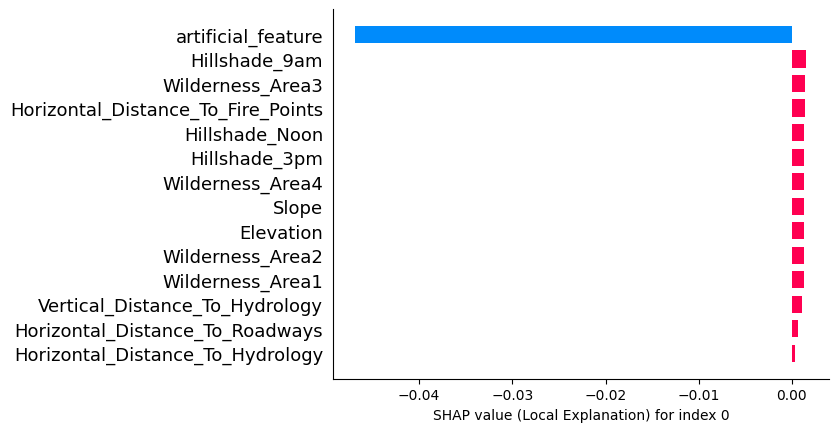

In [47]:
from src.utils.visualisation.deterministic_values import local_bar_plot, global_bar_plot
local_bar_plot(shapley_values, 0, feature_names=feature_names)

Since this group now has an abnormal artificial feature added, the feature attributions change accordingly. Now the artificial feature is the one more responsible for the outcome and the older remaining features just shift a little to a lower value. (some positive contributions becomes negative)

The artificial_feature has the highest shapley value for the altered group as expected

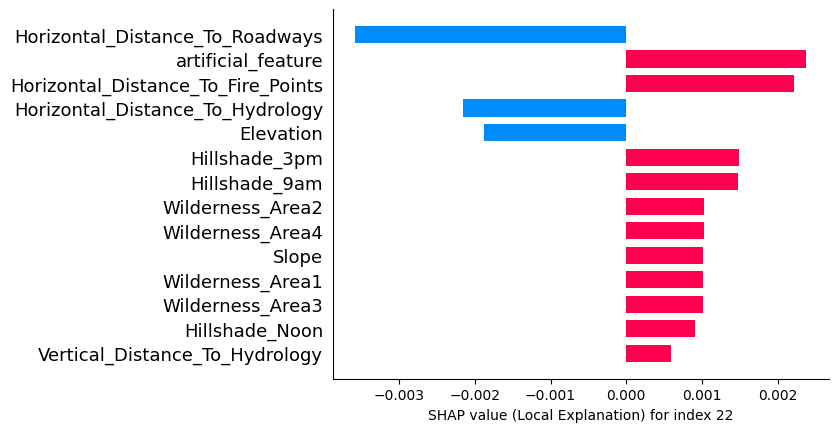

In [49]:
local_bar_plot(shapley_values, 22, feature_names=feature_names)

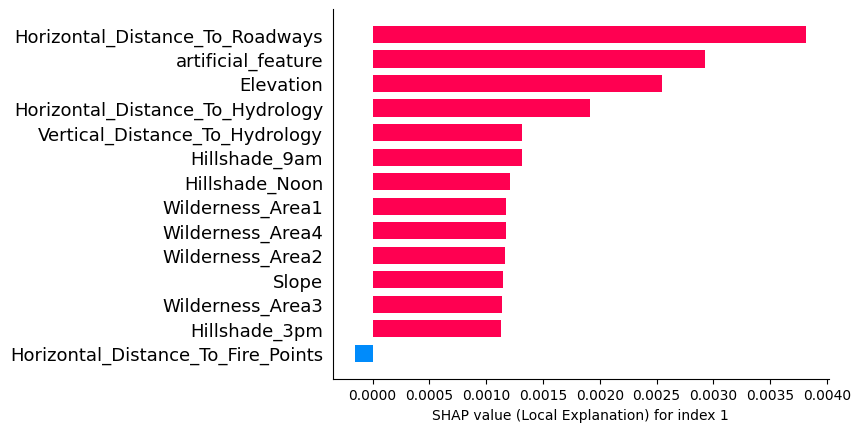

In [50]:
local_bar_plot(shapley_values, 1, feature_names=feature_names)

The features contributing to this group being an outleir almost remain the same and we can see that artificial_feature is again contributing negataively. 

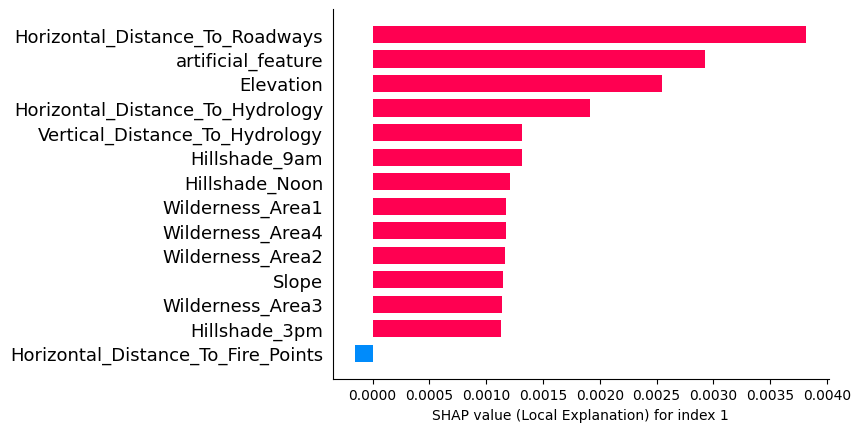

In [51]:
local_bar_plot(shapley_values, 1, feature_names=feature_names) # inlier 

/tmp/ipykernel_175451/1214104310.py:2: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  mean_abs_shap_values = np.abs(shapley_values.T).mean(axis=0)


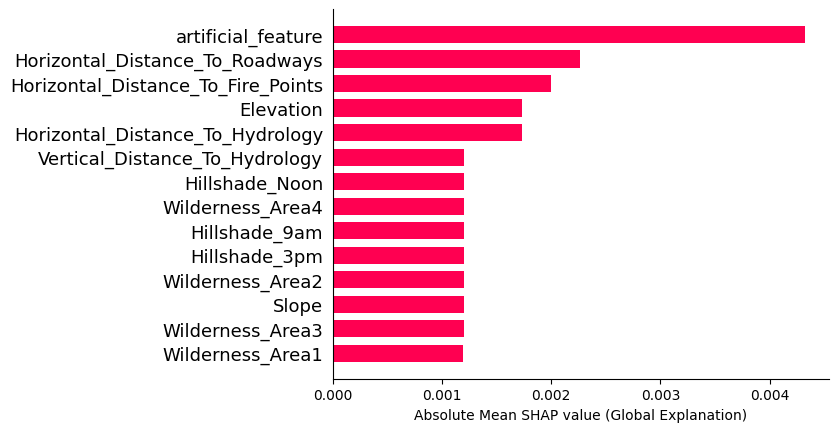

In [52]:
# global importance measure
mean_abs_shap_values = np.abs(shapley_values.T).mean(axis=0)  

# Call bar_plot for global explanation
global_bar_plot(mean_abs_shap_values, feature_names=feature_names)

/tmp/ipykernel_175451/1469941899.py:2: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  mean_abs_shap_values_outlier = np.abs(selected_shap_values).mean(axis=1)


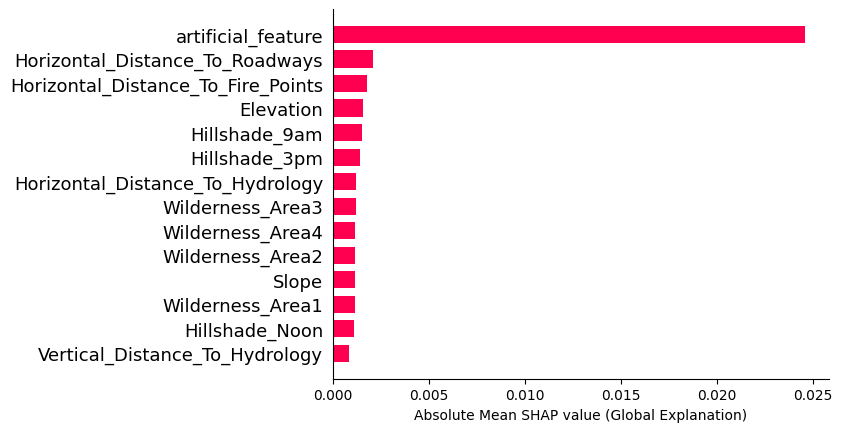

In [53]:
selected_shap_values = shapley_values[:,outlier_indices]
mean_abs_shap_values_outlier = np.abs(selected_shap_values).mean(axis=1) 
global_bar_plot(mean_abs_shap_values_outlier, feature_names=feature_names)

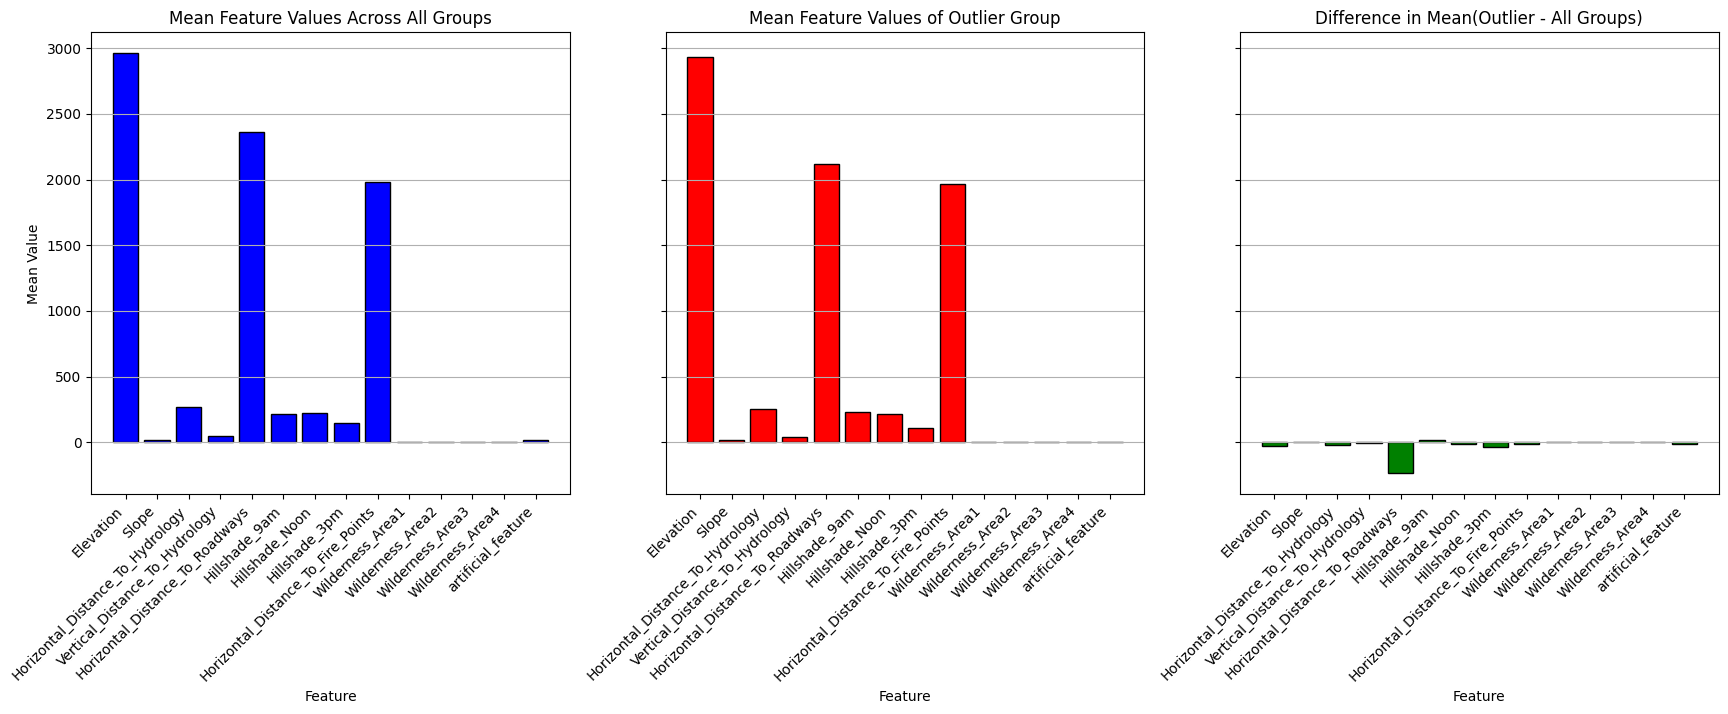

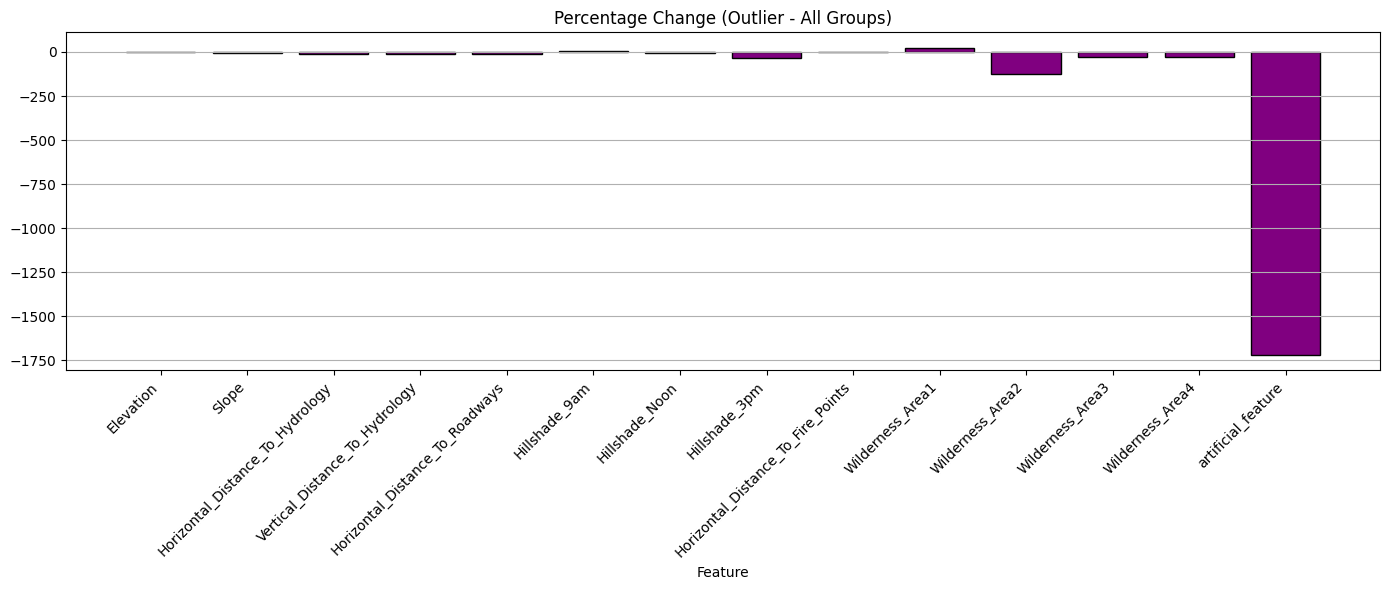

In [54]:
mean_all_groups = np.mean([np.mean(group, axis=0) for i, group in enumerate(datasets) if i != 8], axis=0)

# Compute mean feature values for the outlier group
mean_outlier_group = np.mean(datasets[8], axis=0)

# Compute the delta between the two (outlier vs all groups)
difference_values = mean_outlier_group - mean_all_groups

percentage_change = ((mean_outlier_group - mean_all_groups) / mean_outlier_group) * 100

# Feature names for labeling
num_features = len(mean_all_groups)
x_labels = feature_names[:num_features]  # Adjust based on the number of features

# Plot histograms
fig, ax = plt.subplots(1, 3, figsize=(21, 6), sharey=True)

# Mean feature values for all groups (excluding outlier)
ax[0].bar(range(num_features), mean_all_groups, color='blue', edgecolor='black')
ax[0].set_xticks(range(num_features))
ax[0].set_xticklabels(x_labels, rotation=45, ha='right')
ax[0].set_title('Mean Feature Values Across All Groups')
ax[0].set_xlabel('Feature')
ax[0].set_ylabel('Mean Value')
ax[0].grid(axis='y')

# Mean feature values for the outlier group
ax[1].bar(range(num_features), mean_outlier_group, color='red', edgecolor='black')
ax[1].set_xticks(range(num_features))
ax[1].set_xticklabels(x_labels, rotation=45, ha='right')
ax[1].set_title('Mean Feature Values of Outlier Group')
ax[1].set_xlabel('Feature')
ax[1].grid(axis='y')

# Delta values (difference between the outlier group and all groups)
ax[2].bar(range(num_features), difference_values, color='green', edgecolor='black')
ax[2].set_xticks(range(num_features))
ax[2].set_xticklabels(x_labels, rotation=45, ha='right')
ax[2].set_title('Difference in Mean(Outlier - All Groups)')
ax[2].set_xlabel('Feature')
ax[2].grid(axis='y')

# ax[3].bar(range(num_features), percentage_change, color='purple', edgecolor='black')
# ax[3].set_xticks(range(num_features))
# ax[3].set_xticklabels(x_labels, rotation=45, ha='right')
# ax[3].set_title('Percentage Change (Outlier - All Groups)')
# ax[3].set_xlabel('Feature')
# ax[3].grid(axis='y')

fig, ax2 = plt.subplots(figsize=(14, 6))  # New figure for the percentage change plot
ax2.bar(range(num_features), percentage_change, color='purple', edgecolor='black')
ax2.set_xticks(range(num_features))
ax2.set_xticklabels(x_labels, rotation=45, ha='right')
ax2.set_title('Percentage Change (Outlier - All Groups)')
ax2.set_xlabel('Feature')
ax2.grid(axis='y')

plt.tight_layout()
plt.show()